# Laboratory lab 4

## Prepare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import itertools
from scipy.spatial import ConvexHull
from scipy.spatial.transform import Rotation

In [2]:
edge_1 = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1] ])

## Task 2

Define the cube through its vertices. Scale the cube (zoom in, zoom out several times). Write the corresponding matrix.

In [3]:
# matrix

# translation = np.array([
#     [1, 0, 0, a],
#     [0, 1, 0, u],
#     [0, 0, 0, 1]
# ])

# scaling = np.array(
    # [
#         [a, 0, 0, 0],
#         [0, b, 0, 0],
#         [0, 0, y, 0],
#         [0, 0, 0, 1]
#     ]
# )


In [4]:
def init(center, size):
    c = np.array(center)
    s = size / 2
    offsets = np.array(list(itertools.product([-1, 1], repeat=3))) * s
    return c + offsets

In [5]:
edge = init((1,4,3), 3)

In [6]:
def visual(vertices, ax, color, a=0.6):
    center = np.mean(vertices, axis=0)
    
    faces = []
    for normal in [np.array([0,0,-1]), np.array([0,0,1]),  
                  np.array([0,-1,0]), np.array([0,1,0]),   
                  np.array([-1,0,0]), np.array([1,0,0])]:
        
        proj = np.dot(vertices - center, normal)
        face = vertices[np.argsort(proj)[-4:]]

        angles = np.arctan2(face[:,1]-center[1], face[:,0]-center[0])
        face = face[np.argsort(angles)]
        faces.append(face)
    
    poly3d = Poly3DCollection(faces, facecolor=color, edgecolor='black', alpha=a)
    ax.add_collection3d(poly3d)
    ax.set_box_aspect([1, 1, 1])

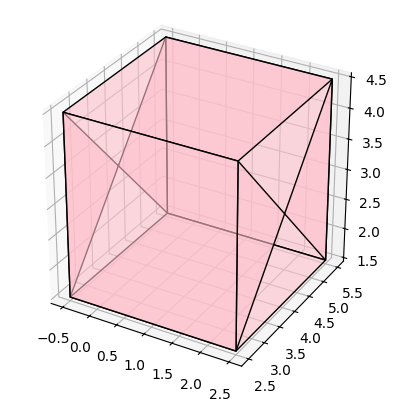

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visual(edge, ax=ax, color="pink")

In [8]:
def scale(verts, a):

    scaling = np.array(
    [
        [a, 0, 0, 0],
        [0, a, 0, 0],
        [0, 0, a, 0],
        [0, 0, 0, 1]
    ]
)
    vertices = np.hstack((verts, np.ones((verts.shape[0], 1))))

    scaled = vertices @ scaling.T 
    scaled = scaled[:,:3]
    return scaled, scaling

In [9]:
# fig = plt.figure()
# ax2 = fig.add_subplot(111, projection='3d')

scaled_cube, matrix = scale(edge, 3)
min_cube, matrix = scale(edge, 0.5)

# print(f'\t scaled: \n {scaled_cube} , \n  \t  original: \n {edge},  \n  \t  min cube: \n {min_cube}.')

df = pd.DataFrame({
    'scaled': [str(row) for row in scaled_cube],
    'original': [str(row) for row in edge],
    'min copy of cube': [str(row) for row in min_cube]
})

df

,scaled,original,min copy of cube
0,[-1.5 7.5 4.5],[-0.5 2.5 1.5],[-0.25 1.25 0.75]
1,[-1.5 7.5 13.5],[-0.5 2.5 4.5],[-0.25 1.25 2.25]
2,[-1.5 16.5 4.5],[-0.5 5.5 1.5],[-0.25 2.75 0.75]
3,[-1.5 16.5 13.5],[-0.5 5.5 4.5],[-0.25 2.75 2.25]
4,[7.5 7.5 4.5],[2.5 2.5 1.5],[1.25 1.25 0.75]
5,[ 7.5 7.5 13.5],[2.5 2.5 4.5],[1.25 1.25 2.25]
6,[ 7.5 16.5 4.5],[2.5 5.5 1.5],[1.25 2.75 0.75]
7,[ 7.5 16.5 13.5],[2.5 5.5 4.5],[1.25 2.75 2.25]


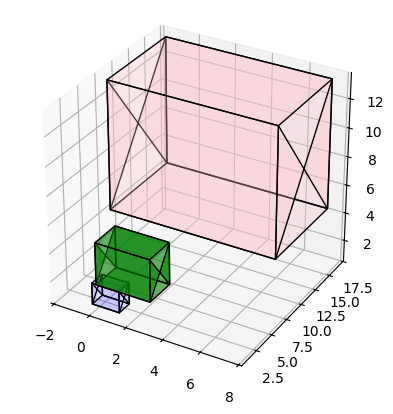

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


visual(min_cube, ax=ax, color="blue", a = 0.1)
visual(edge, ax=ax, color="green")
visual(scaled_cube, ax=ax, color='pink', a = 0.3)

## Task 3

The result obtained from the previous paragraph is to symmetrically display
relative to the origin, relative to one of the coordinate planes in
three-dimensional Cartesian coordinate system (space).

In [11]:
def sym(verts, a=-1, b=-1, c=-1):
    additional =  np.hstack((verts, np.ones((edge.shape[0], 1))))

    reflection = np.array(
        [
            [a, 0, 0, 0],
            [0, b, 0, 0],
            [0, 0, c, 0],
            [0, 0, 0, 1]
        ]
    )

    result =  additional @ reflection.T
    return result[:, :3]

In [12]:
def draw_plane(ax, plane='xoy', level=0, size=5, color='gray', alpha=0.1):
    vals = np.linspace(-size, size, 2)
    X, Y = np.meshgrid(vals, vals)
    if plane == 'x':
        Z = np.full_like(X, level)
    elif plane == 'y':
        Z = X
        X = np.full_like(Y, level)
    elif plane == 'z':
        Z = Y
        Y = np.full_like(X, level)
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)

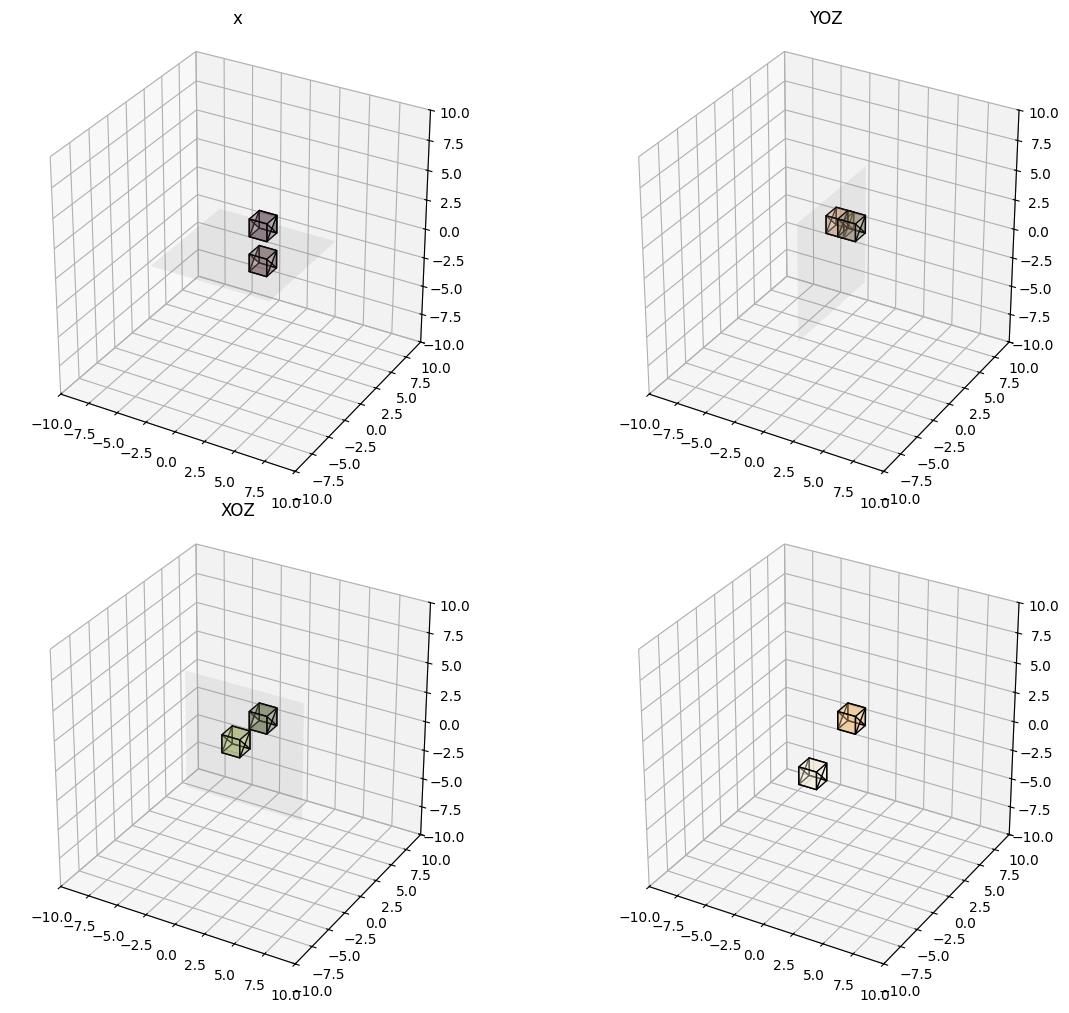

In [13]:
# fig = plt.figure()
# ax_sym = fig.add_subplot(111, projection='3d')

sym_r = sym(min_cube)
sym_xoy = sym(min_cube, a=1, b=1, c=-1)
sym_yoz = sym(min_cube, a=-1, b=1, c=1)
sym_xoz = sym(min_cube, a=1, b=-1, c=1)

# visual(sym_1_result, ax=ax_sym, color="blue", a = 0.2)
# visual(edge, ax=ax_sym, color="pink", a = 0.2)
# visual(min_cube, ax=ax_sym, color="blue", a = 0.5)

fig, axs = plt.subplots(2, 2, figsize=(13, 10), subplot_kw=dict(projection='3d'))

ax = axs[0, 0]

draw_plane(ax, plane='x')
visual(min_cube, ax=ax, color='#604652', a=0.4)
visual(sym_xoy, ax=ax, color='#735557', a=0.4)
ax.set(xlim=(-10,10), ylim=(-10,10), zlim=(-10,10))
ax.set_title("x")

ax.set_box_aspect([1, 1, 1])


ax = axs[0, 1]
draw_plane(ax, plane='y')
visual(min_cube, ax=ax, color='#97866A', a=0.4)
visual(sym_yoz, ax=ax, color='#D29F80', a=0.4)
ax.set(xlim=(-10,10), ylim=(-10,10), zlim=(-10,10))
ax.set_title("YOZ")

ax.set_box_aspect([1, 1, 1])

ax = axs[1, 0]
draw_plane(ax, plane='z')
visual(min_cube, ax=ax, color='#626F47', a=0.4)
visual(sym_xoz, ax=ax, color='#A4B465', a=0.4)
ax.set(xlim=(-10,10), ylim=(-10,10), zlim=(-10,10))
ax.set_title("XOZ")

ax.set_box_aspect([1, 1, 1])

ax = axs[1, 1]
visual(min_cube, ax=ax, color='#F0BB78', a=0.4)
visual(sym_r, ax=ax, color='#F5ECD5', a=0.4)
ax.set(xlim=(-10,10), ylim=(-10,10), zlim=(-10,10))
ax.set_title("")

ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.show()


## Task 4

Define a line as in Example 1 of this lab. Rotate the
cube relative to the line by some angle φ. Specify the transformations required by
to obtain this result.

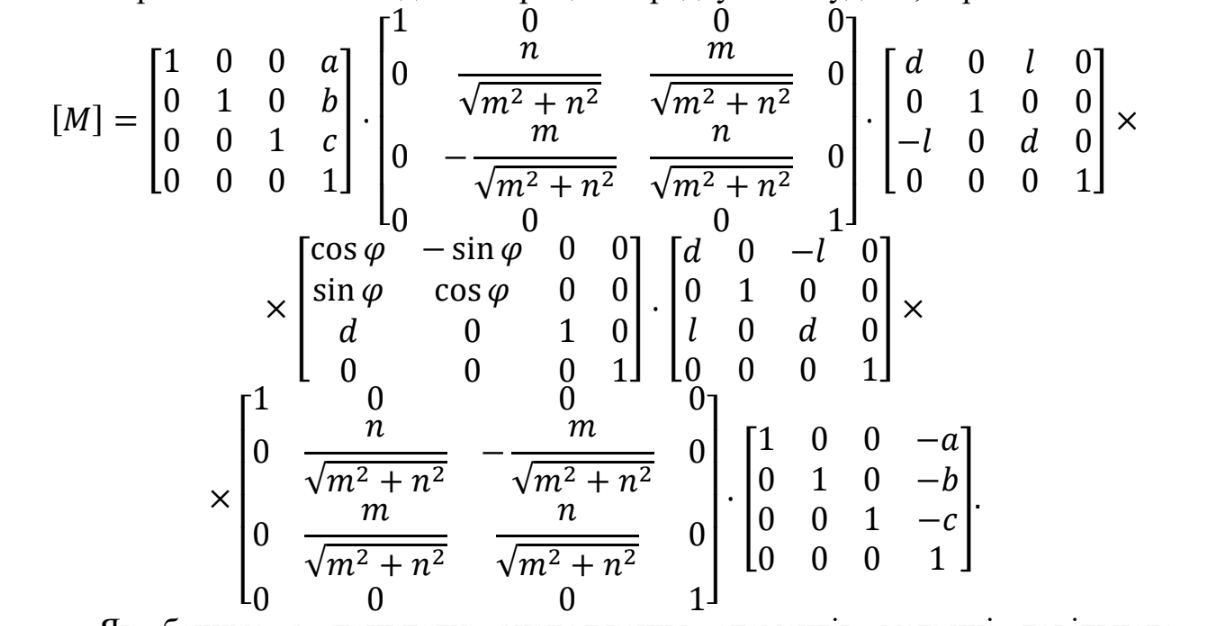

In [14]:
def task4(verts, phi_deg, point, line):

    point = np.array(point, dtype=float)
    line = np.array(line, dtype=float)
    phi = np.radians(phi_deg)

    vertices_h = np.hstack((verts, np.ones((verts.shape[0], 1)))).T

    T = np.block([
    [np.eye(3), -point.reshape(3, 1)],
    [np.zeros((1, 3)), np.array([[1]])]
    ]   )           # 0 0 0

    T_inv = np.block([
    [np.eye(3), point.reshape(3, 1)],
    [np.zeros((1, 3)), np.array([[1]])]
    ]   )   

    d_yz = np.sqrt(np.sum(line[1:]**2)) 

    cos_x = line[2] / d_yz
    sin_x = line[1] / d_yz

    d_xyz = np.sqrt(np.sum(line**2)) 
    cos_y = d_yz / d_xyz
    sin_y = line[0] / d_xyz

    R_x = np.array([
        [1, 0,      0,     0],
        [0, cos_x, -sin_x, 0],
        [0, sin_x,  cos_x, 0],
        [0, 0,      0,     1]
    ])

    R_y = np.array([
        [ cos_y, 0, sin_y, 0],
        [     0, 1,     0, 0],
        [-sin_y, 0, cos_y, 0],
        [     0, 0,     0, 1]
    ])

    R_z = np.array([
        [np.cos(phi), -np.sin(phi), 0, 0],
        [np.sin(phi),  np.cos(phi), 0, 0],
        [0,            0,           1, 0],
        [0,            0,           0, 1]
    ])

    M = T_inv @ R_x.T @ R_y.T @ R_z @ R_y @ R_x @ T
    rotated = (M @ vertices_h).T[:, :3]

    return rotated


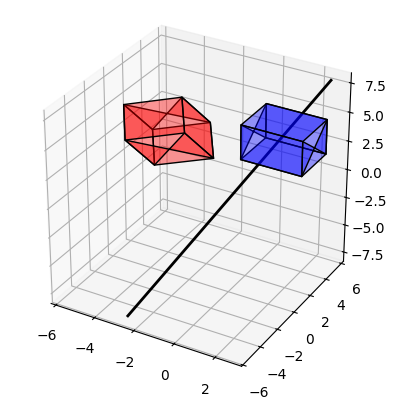

In [15]:
edge = init((1, 4, 3), 3)

point = np.array([0, 0, 0])
line = np.array([1, 2, 3])  

rotated = task4(edge, 180, point, line)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

visual(edge, ax, color='blue', a=0.4)
visual(rotated, ax, color='red', a=0.4)

line_length = 10

line_pts = np.array([
    point - line / np.linalg.norm(line) * line_length,
    point + line / np.linalg.norm(line) * line_length
])

ax.plot(line_pts[:, 0], line_pts[:, 1], line_pts[:, 2], color='black', linewidth=2)

plt.show()

## Task 5

Set the plane as in Example 2, make the cube symmetrical with respect to the plane, specify all mathematical transformations, and show the final result that meets the requirements of the problem. Write down the corresponding mathematical
transformations.

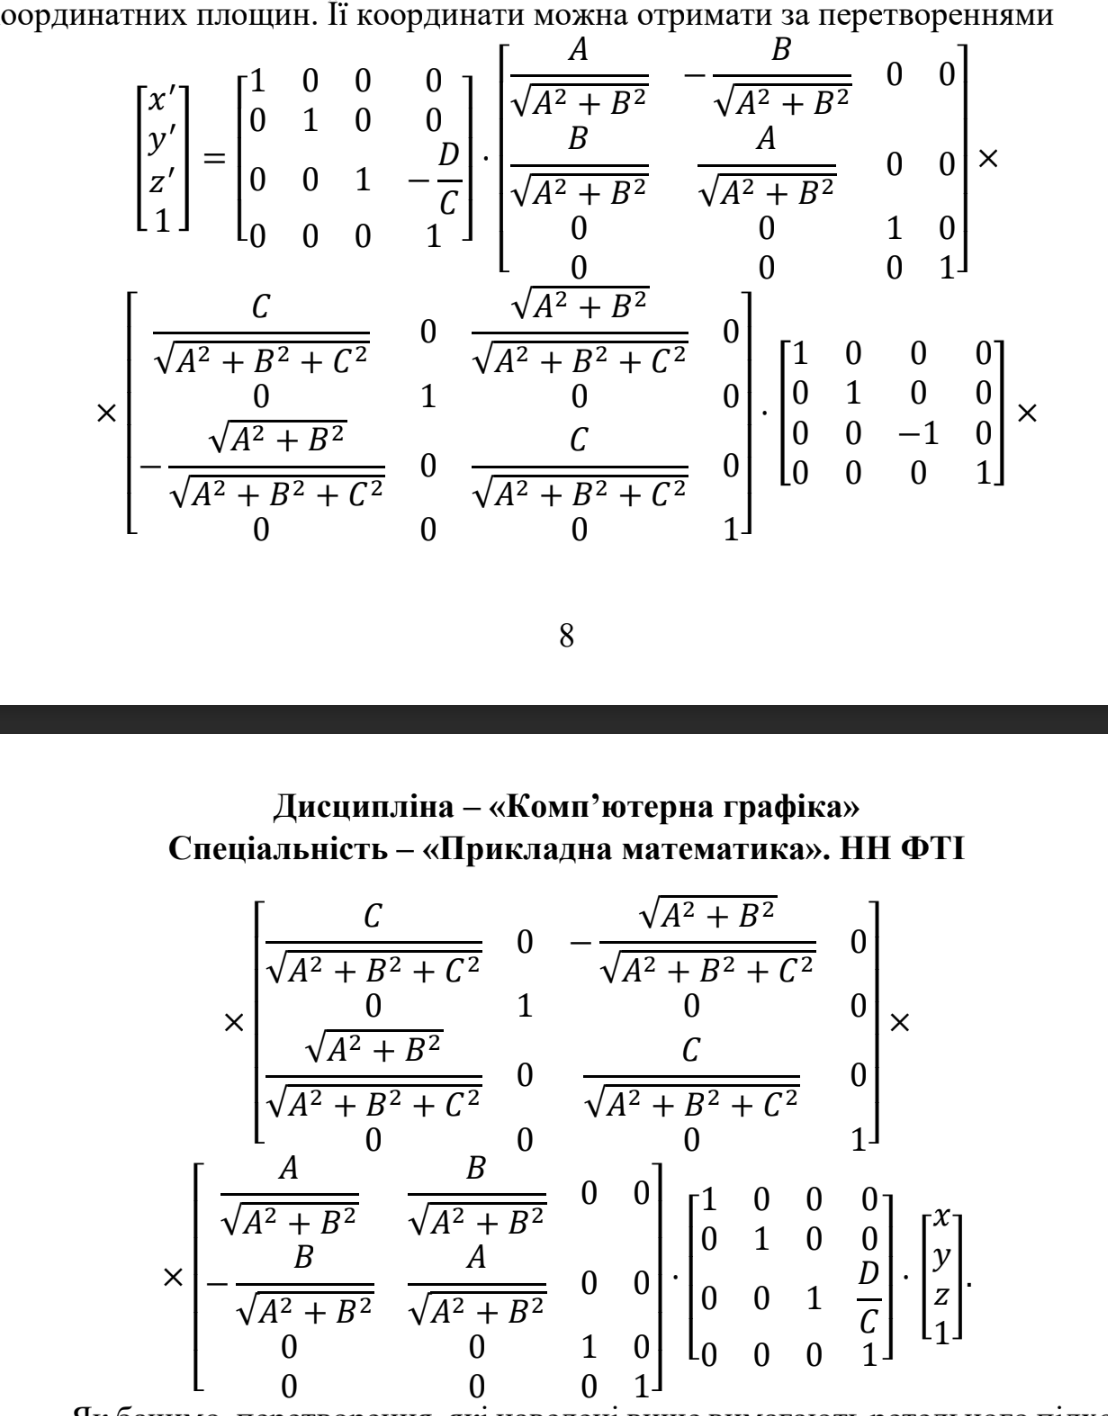

In [16]:
def task5_danger_2(verts, points, plane_normal):

    points = np.float32(points)
    plane_normal = np.float32(plane_normal)
    norm = np.sqrt(np.dot(plane_normal, plane_normal))
    plane_normal = plane_normal / norm

    verts = np.array(verts, dtype=np.float32)
    vertices_h = np.vstack((verts.T, np.ones((1, verts.shape[0]), dtype=np.float32))).T

    A, B, C = plane_normal
    D = -np.dot(plane_normal, points)


    matrix_z = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, D / C],
                         [0, 0, 0, 1]], dtype=np.float32)

    denom_xy = np.sqrt(A*A + B*B)
    
    if denom_xy == 0:
        matrix_rotation = np.eye(4, dtype=np.float32)
    else:
        matrix_rotation = np.array([[A/denom_xy, B/denom_xy, 0, 0],
                                    [-B/denom_xy, A/denom_xy, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 0, 0, 1]], dtype=np.float32)

    denom_xyz = np.sqrt(A*A + B*B + C*C)

    matrix_rotation_y = np.array([[C/denom_xyz, 0, -denom_xy/denom_xyz, 0],
                                  [0, 1, 0, 0],
                                  [denom_xy/denom_xyz, 0, C/denom_xyz, 0],
                                  [0, 0, 0, 1]], dtype=np.float32)

    matrix_xy = np.array([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, -1, 0],
                          [0, 0, 0, 1]], dtype=np.float32)

    matrix_y_back = matrix_rotation_y.T
    matrix_z_back = matrix_rotation.T

    matrix_back = np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 1, -D / C],
                            [0, 0, 0, 1]], dtype=np.float32)

    matrices = [matrix_back, matrix_z_back, matrix_y_back, matrix_xy, matrix_rotation_y, matrix_rotation, matrix_z]

    result = np.eye(4, dtype=np.float32)
    for dot_matrix in matrices:
        result = dot_matrix @ result

    #graph_result = np.einsum('ij,kj->ki', result[:3,:], vertices_h)
    graph_result = (vertices_h @ result.T)[:, :3]
    return graph_result


In [17]:
def draw_plane_2(ax, normal, point, size=5, color='gray', alpha=0.2):
    normal = np.array(normal)
    point = np.array(point)
    d = -point.dot(normal)

    xx, yy = np.meshgrid(np.linspace(-size, size, 10),
                         np.linspace(-size, size, 10))

    if normal[2] != 0:
        zz = (-normal[0]*xx - normal[1]*yy - d) / normal[2]
    else:
        zz = np.full_like(xx, point[2])
    
    ax.plot_surface(xx, yy, zz, color=color, alpha=alpha)

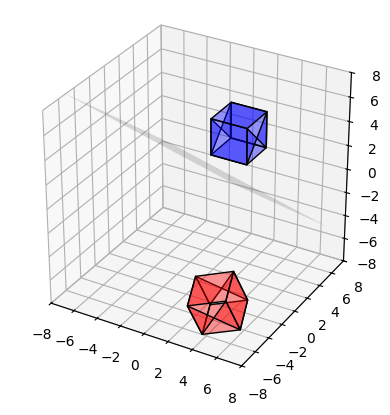

In [18]:
edge = init((1, 4, 3), 3) 

plane_point = [3, -2, 3]         
plane_normal = [1, 3, 4]  

reflected = task5_danger_2(edge, plane_point, plane_normal)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visual(edge, ax, 'blue', 0.4)
visual(reflected, ax, 'red', 0.4)

draw_plane_2(ax, plane_normal, plane_point, size=7, color='gray', alpha=0.2)

a, b = -8,8
ax.set_xlim(a, b)
ax.set_ylim(a, b)
ax.set_zlim(a, b)


plt.show()


## Task 10

In [19]:
def orthogonal(points, plane_point, normal_plane):
    normal_plane = normal_plane / np.linalg.norm(normal_plane)  
    projected_points = []
    for point in points:

        distance = np.dot(point - plane_point, normal_plane)
        projected_point = point - distance * normal_plane
        projected_points.append(projected_point)
    return np.array(projected_points)

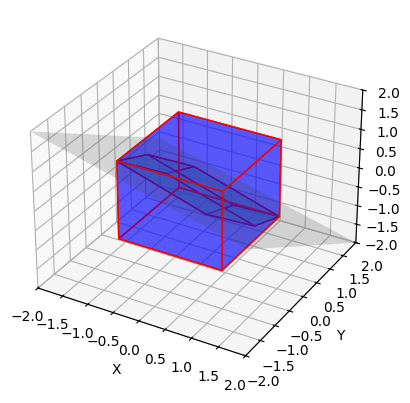

In [20]:
cube_vertices = np.array([[1, 1, 1],
                           [1, 1, -1],
                           [1, -1, 1],
                           [1, -1, -1],
                           [-1, 1, 1],
                           [-1, 1, -1],
                           [-1, -1, 1],
                           [-1, -1, -1]])

plane_point = np.array([0, 0, 0])  
normal_plane = np.array([1, 2, 3])  

result_cube = orthogonal(cube_vertices, plane_point, normal_plane)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

faces = [[cube_vertices[j] for j in [0, 1, 3, 2]],  
         [cube_vertices[j] for j in [4, 5, 7, 6]],
         [cube_vertices[j] for j in [0, 1, 5, 4]],  
         [cube_vertices[j] for j in [2, 3, 7, 6]],  
         [cube_vertices[j] for j in [0, 2, 6, 4]],  
         [cube_vertices[j] for j in [1, 3, 7, 5]]]  

ax.add_collection3d(Poly3DCollection(faces, facecolors='blue', linewidths=1, edgecolors='r', alpha=0.4))

projected_faces = [[result_cube[j] for j in [0, 1, 3, 2]],  
                   [result_cube[j] for j in [4, 5, 7, 6]],  
                   [result_cube[j] for j in [0, 1, 5, 4]],  
                   [result_cube[j] for j in [2, 3, 7, 6]],  
                   [result_cube[j] for j in [0, 2, 6, 4]], 
                   [result_cube[j] for j in [1, 3, 7, 5]]] 


ax.add_collection3d(Poly3DCollection(projected_faces, facecolors='lightgreen', linewidths=1, edgecolors='r', alpha=0.4))

xx, yy = np.meshgrid([-2, 2], [-2, 2]) 
zz = (-normal_plane[0] * xx - normal_plane[1] * yy + np.dot(normal_plane, plane_point)) / normal_plane[2]

ax.plot_surface(xx, yy, zz, color='gray', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

plt.show()